## Import libraries and load DataSet

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix

df = pd.read_csv('SDSS_DR18.csv')

## Exploratory Data Analysis

In [3]:
# Initial DataFrame
df

,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,...,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,...,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,...,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,...,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,...,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.240000e+18,3.580000e+18,154.077143,55.614066,19.39861,18.35476,18.00348,17.89408,17.81222,2243,...,18.35865,17.90406,17.82489,0.999653,0.999791,0.794516,0.802310,0.537987,-0.000101,STAR
99996,1.240000e+18,3.580000e+18,154.067926,55.635794,19.07703,18.05159,17.78332,17.68976,17.66209,2243,...,18.06198,17.69745,17.67005,0.802407,0.999912,0.999776,0.999682,0.544329,-0.000352,STAR
99997,1.240000e+18,1.070000e+18,153.897018,55.712582,19.07982,17.51349,16.64037,16.24183,15.91180,2243,...,19.05242,17.79391,17.40130,0.859021,0.760212,0.769053,0.772322,0.845797,0.117501,GALAXY
99998,1.240000e+18,6.950000e+17,235.656141,56.297044,17.27528,16.41704,16.11662,15.98858,15.97745,2206,...,16.42854,15.98151,15.97900,0.655041,0.199795,0.481020,0.650008,0.822835,-0.000400,STAR


Number of rowns and columns

In [4]:
df.shape

(100000, 43)

Checking null or missing values in the data

In [5]:
df.isnull().sum()

objid          0
specobjid      0
ra             0
dec            0
u              0
g              0
r              0
i              0
z              0
run            0
rerun          0
camcol         0
field          0
plate          0
mjd            0
fiberid        0
petroRad_u     0
petroRad_g     0
petroRad_i     0
petroRad_r     0
petroRad_z     0
petroFlux_u    0
petroFlux_g    0
petroFlux_i    0
petroFlux_r    0
petroFlux_z    0
petroR50_u     0
petroR50_g     0
petroR50_i     0
petroR50_r     0
petroR50_z     0
psfMag_u       0
psfMag_r       0
psfMag_g       0
psfMag_i       0
psfMag_z       0
expAB_u        0
expAB_g        0
expAB_r        0
expAB_i        0
expAB_z        0
redshift       0
class          0
dtype: int64

In [6]:
null = df.isnull().sum().max()

if null == 0:
    print('There is no missing values')
else:
    print('There is missing values')

There is no missing values


Now I'm using info() function to check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   objid        100000 non-null  float64
 1   specobjid    100000 non-null  float64
 2   ra           100000 non-null  float64
 3   dec          100000 non-null  float64
 4   u            100000 non-null  float64
 5   g            100000 non-null  float64
 6   r            100000 non-null  float64
 7   i            100000 non-null  float64
 8   z            100000 non-null  float64
 9   run          100000 non-null  int64  
 10  rerun        100000 non-null  int64  
 11  camcol       100000 non-null  int64  
 12  field        100000 non-null  int64  
 13  plate        100000 non-null  int64  
 14  mjd          100000 non-null  int64  
 15  fiberid      100000 non-null  int64  
 16  petroRad_u   100000 non-null  float64
 17  petroRad_g   100000 non-null  float64
 18  petroRad_i   100000 non-n

Now I'm checking summary statistics using describe() function. The describe() function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation, etc. Any missing value or NaN value is automatically skipped. describe() function gives a good picture of the distribution of data.

In [8]:
df.describe()

,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.240000e+18,1.859200e+18,168.856657,17.832739,18.641137,17.407088,16.878550,16.517137,16.154837,1477.564770,...,17.884605,18.392280,17.531364,17.138493,0.588445,0.673314,0.660934,0.549130,0.311389,0.168441
std,0.000000e+00,2.265257e+18,83.844216,26.344079,0.829035,0.974683,1.118858,31.694636,54.871034,459.696408,...,1.288541,1.282606,31.701194,54.876352,0.260097,0.235317,0.242927,31.622620,54.770201,0.434285
min,1.240000e+18,2.990000e+17,0.003092,-11.252825,11.726470,11.696170,11.277090,-9999.000000,-9999.000000,94.000000,...,11.253550,11.658570,-9999.000000,-9999.000000,0.050000,0.050000,0.050000,-9999.000000,-9999.000000,-0.004268
25%,1.240000e+18,5.280000e+17,128.879582,-0.537780,18.214315,16.853340,16.194763,15.861995,15.620268,1239.000000,...,17.098733,17.600867,16.842290,16.645390,0.387406,0.514009,0.487474,0.470529,0.409965,0.000065
50%,1.240000e+18,6.980000e+17,168.079889,2.899490,18.878005,17.520310,16.896065,16.594740,16.419040,1458.000000,...,18.023495,18.585375,17.742665,17.526325,0.611638,0.704848,0.692239,0.679104,0.641443,0.048772
75%,1.240000e+18,2.750000e+18,214.554569,46.911371,19.275750,18.052460,17.565593,17.310102,17.193873,1854.000000,...,18.858960,19.327640,18.586033,18.366243,0.796679,0.864902,0.863116,0.849946,0.822491,0.096680
max,1.240000e+18,1.410000e+19,359.996095,68.731483,19.599990,19.977270,31.698160,30.980870,28.668700,2327.000000,...,24.802850,25.962180,24.362590,27.043280,1.000000,1.000000,1.000000,1.000000,1.000000,6.990327


Checking duplicates

In [9]:
df.duplicated().sum()

0

## Target column
Counting unique values of 'class' column.

In [10]:
df['class'].value_counts()

class
GALAXY    52343
STAR      37232
QSO       10425
Name: count, dtype: int64

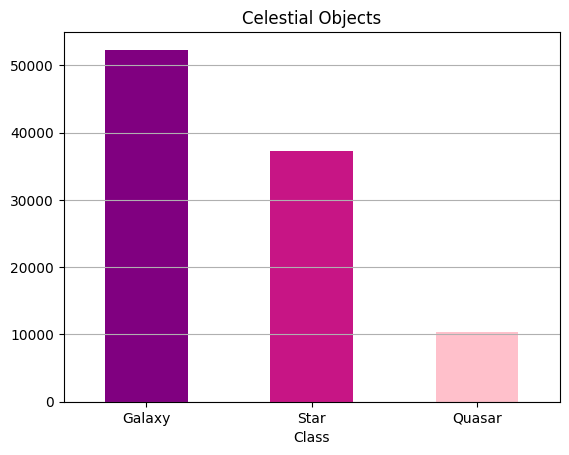

In [11]:
classTypes = ['Galaxy', 'Star', 'Quasar']

galaxy =  df[df['class'] == 'GALAXY'].shape[0]
star = df[df['class']  == 'STAR'].shape[0]
quasar = df[df['class']  == 'QSO'].shape[0]

color = ['purple','mediumvioletred','pink']

classes = pd.DataFrame({'Class':['Galaxy', 'Star', 'Quasar'], 'Count':[ float(galaxy), float(star), float(quasar)]})

classBar = classes.plot.bar(x='Class', y='Count', rot=0, color = color, title ='Celestial Objects', legend=False).grid(axis='y')

In [12]:
df['class'] = pd.factorize(df['class'])[0]
df['class'].value_counts()

class
0    52343
1    37232
2    10425
Name: count, dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

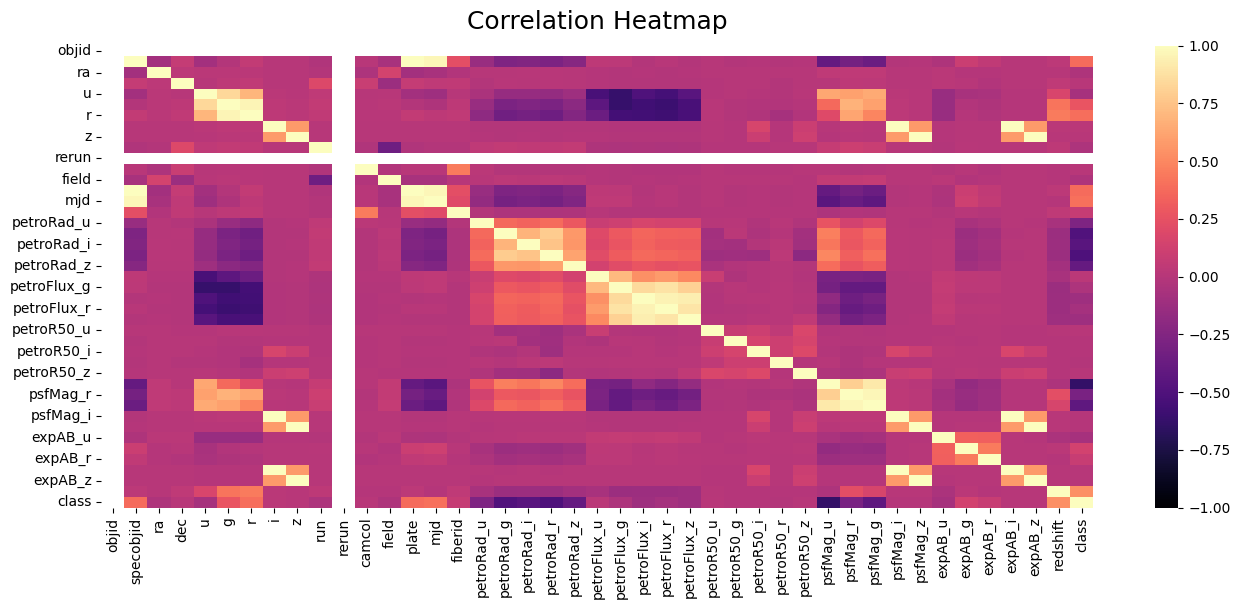

In [13]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap = 'magma')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [14]:
corr = df.corr()
corr['class'].sort_values(ascending=True).to_frame()

,class
psfMag_u,-0.640143
petroRad_r,-0.511597
petroRad_g,-0.493758
petroRad_i,-0.459967
psfMag_g,-0.423533
petroRad_z,-0.395071
psfMag_r,-0.292353
petroRad_u,-0.272655
petroFlux_z,-0.116019
petroFlux_i,-0.111136


Text(0.5, 1.0, 'Features Correlating with Classes')

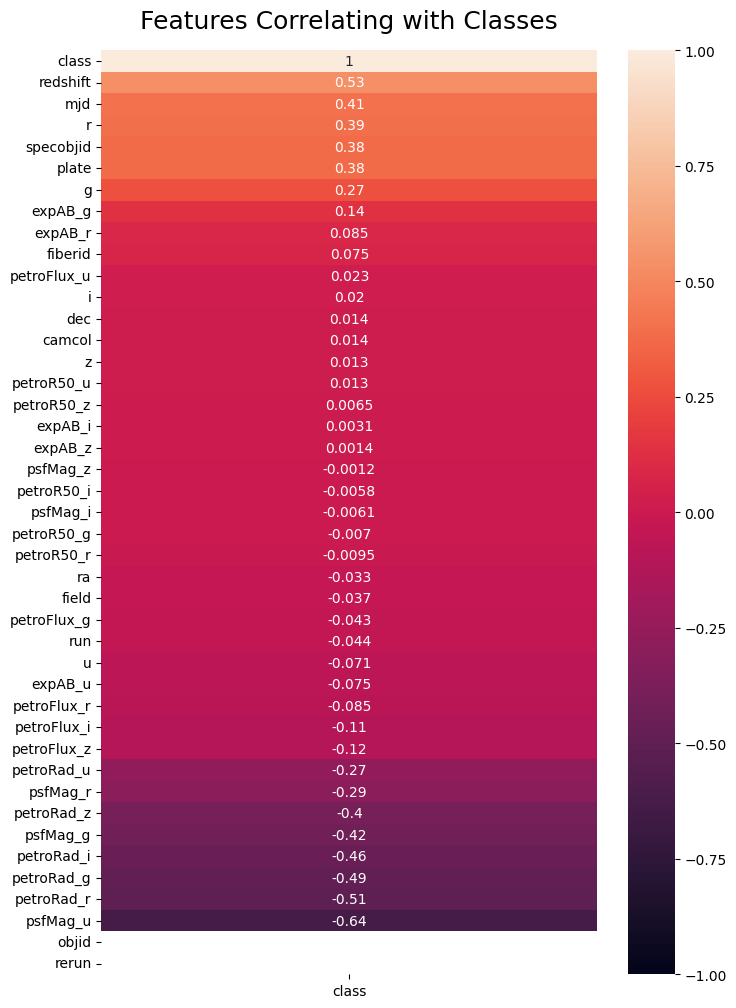

In [15]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['class']].sort_values(by='class', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Classes', fontdict={'fontsize':18}, pad=16)

<Axes: >

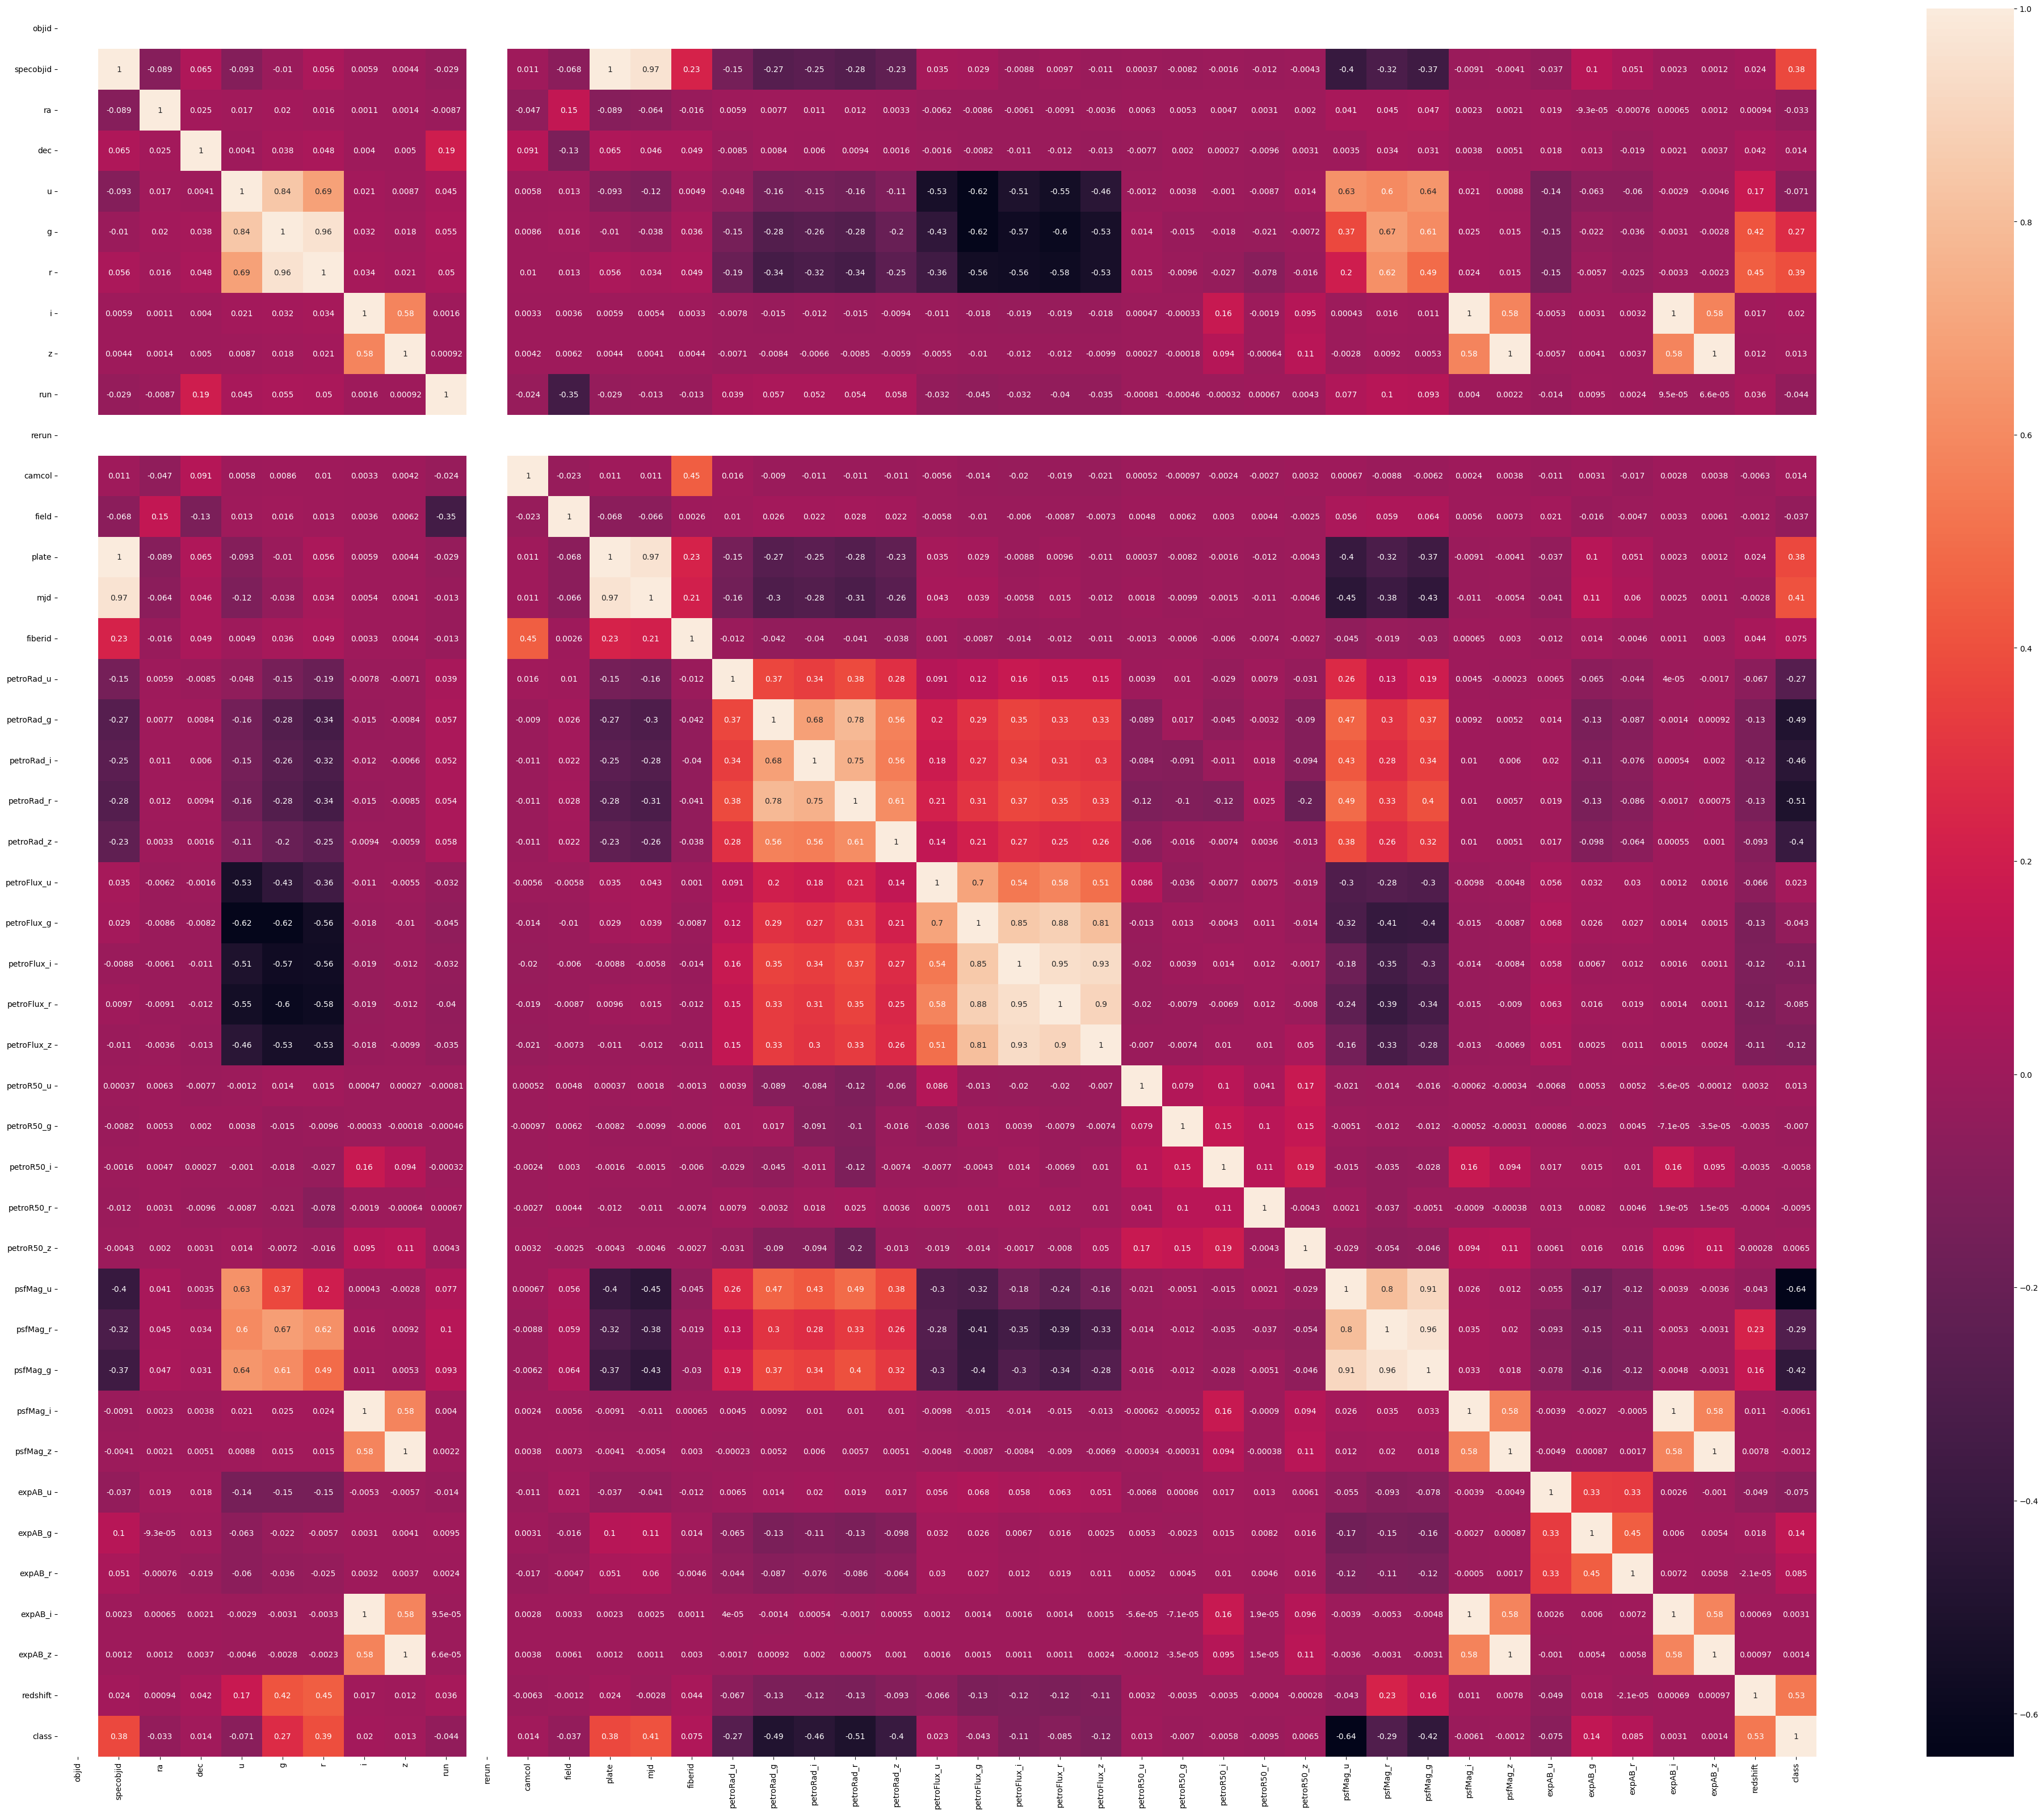

In [16]:
plt.figure(figsize=(50,40))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

In [17]:
y = df['class']
print(y)

0        0
1        1
2        0
3        1
4        1
        ..
99995    1
99996    1
99997    0
99998    1
99999    0
Name: class, Length: 100000, dtype: int64


Droping target column and seletcting features

In [18]:
missClass = df.drop(columns='class', inplace=True)
X = df
X

,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,...,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,...,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,...,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,...,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,...,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.240000e+18,3.580000e+18,154.077143,55.614066,19.39861,18.35476,18.00348,17.89408,17.81222,2243,...,18.01472,18.35865,17.90406,17.82489,0.999653,0.999791,0.794516,0.802310,0.537987,-0.000101
99996,1.240000e+18,3.580000e+18,154.067926,55.635794,19.07703,18.05159,17.78332,17.68976,17.66209,2243,...,17.79733,18.06198,17.69745,17.67005,0.802407,0.999912,0.999776,0.999682,0.544329,-0.000352
99997,1.240000e+18,1.070000e+18,153.897018,55.712582,19.07982,17.51349,16.64037,16.24183,15.91180,2243,...,18.14792,19.05242,17.79391,17.40130,0.859021,0.760212,0.769053,0.772322,0.845797,0.117501
99998,1.240000e+18,6.950000e+17,235.656141,56.297044,17.27528,16.41704,16.11662,15.98858,15.97745,2206,...,16.10380,16.42854,15.98151,15.97900,0.655041,0.199795,0.481020,0.650008,0.822835,-0.000400


Split the data into training and testing sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (80000, 42) (80000,)
Test set: (20000, 42) (20000,)


## SVM Classifier

In [22]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

In [23]:
# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [24]:
# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

In [25]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print confusion matrix
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
class_report = classification_report(y_test, y_pred, digits = 5)
print("Classification Report:")
print(class_report)

[[10285    55    33]
 [   27  7485     0]
 [   76     0  2039]]
Accuracy: 0.99045
Classification Report:
              precision    recall  f1-score   support

           0    0.99008   0.99152   0.99080     10373
           1    0.99271   0.99641   0.99455      7512
           2    0.98407   0.96407   0.97397      2115

    accuracy                        0.99045     20000
   macro avg    0.98895   0.98400   0.98644     20000
weighted avg    0.99043   0.99045   0.99043     20000



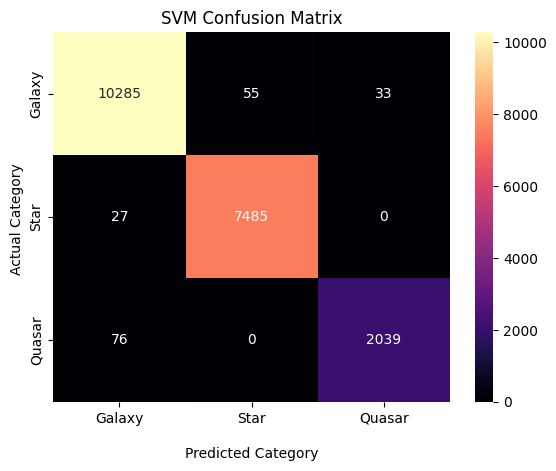

In [26]:
confusion_matrix_svm = sns.heatmap(conf_matrix, annot=True, cmap='magma', fmt='d')

confusion_matrix_svm.set_title('SVM Confusion Matrix')
confusion_matrix_svm.set_xlabel('\nPredicted Category')
confusion_matrix_svm.set_ylabel('Actual Category ')

## Ticket labels - List must be in alphabetical order
confusion_matrix_svm.xaxis.set_ticklabels(['Galaxy','Star', 'Quasar'])
confusion_matrix_svm.yaxis.set_ticklabels(['Galaxy','Star', 'Quasar'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Logistic Regression

In [45]:
# Logistic regression

logReg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1.0, max_iter=1000)
logReg.fit(X_train,y_train)
logReg

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [46]:
# Predict on the training data
y_train_pred = logReg.predict(X_train)
yhat_train_prob = logReg.predict_proba(X_train)

# Predict on the test data
y_test_pred = logReg.predict(X_test)
yhat_test_prob = logReg.predict_proba(X_test)


In [48]:
# Calculate metrics for training data

accuracy_train = accuracy_score(y_train,y_train_pred)
log_loss_train = log_loss(y_train,yhat_train_prob)

# Calculate metrics for test data
accuracy_test = accuracy_score(y_test, y_test_pred)
log_loss_test = log_loss(y_test, yhat_test_prob)

# Print the evaluation metrics
print("Metrics on Training Data:")
print("Accuracy (Train):", accuracy_train)
print("Log Loss (Train):", log_loss_train)

print("Metrics on Test Data:")
print("Accuracy (Test):", accuracy_test)
print("Log Loss (Test):", log_loss_test)

Metrics on Training Data:
Accuracy (Train): 0.9908625
Log Loss (Train): 0.04664295401994141
Metrics on Test Data:
Accuracy (Test): 0.9901
Log Loss (Test): 0.0561561746476722


In [50]:
# Compute confusion matrix
confusion_matrix_logReg = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)
print(confusion_matrix_logReg)

[[10279    61    33]
 [   20  7489     3]
 [   81     0  2034]]


Text(50.722222222222214, 0.5, 'Actual Values ')

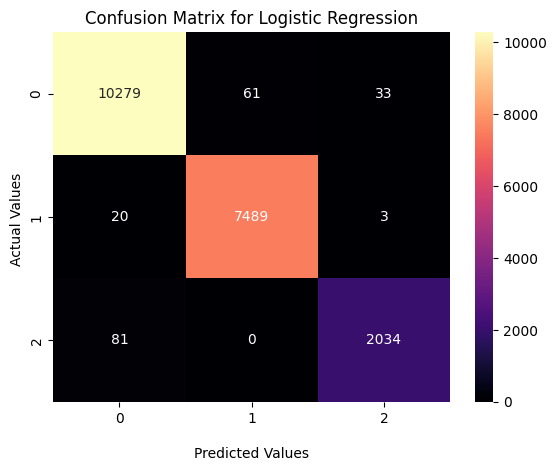

In [52]:
cm = sns.heatmap(confusion_matrix_logReg, cmap='magma', annot=True, fmt='d')
cm.set_title('Confusion Matrix for Logistic Regression')
cm.set_xlabel('\nPredicted Values')
cm.set_ylabel('Actual Values ')


Text(50.722222222222214, 0.5, 'Actual Values ')

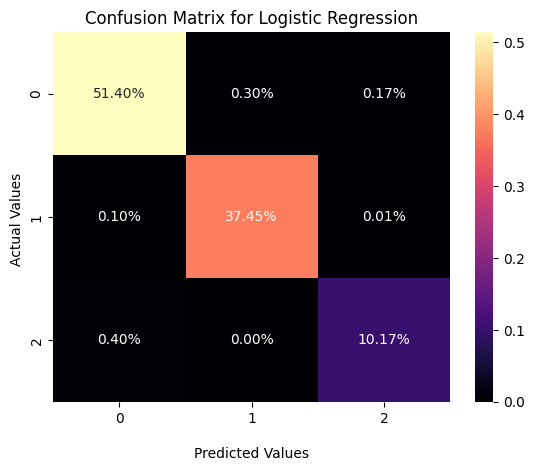

In [53]:
cm = sns.heatmap(confusion_matrix_logReg/np.sum(confusion_matrix_logReg),fmt='.2%', cmap='magma', annot=True)
cm.set_title('Confusion Matrix for Logistic Regression')
cm.set_xlabel('\nPredicted Values')
cm.set_ylabel('Actual Values ')

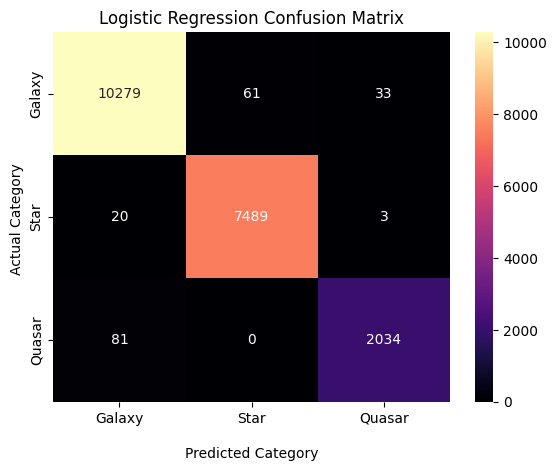

In [57]:
logReg_confusion_matrix = sns.heatmap(confusion_matrix_logReg, annot=True, cmap='magma', fmt='d')

logReg_confusion_matrix.set_title('Logistic Regression Confusion Matrix')
logReg_confusion_matrix.set_xlabel('\nPredicted Category')
logReg_confusion_matrix.set_ylabel('Actual Category ')

## Ticket labels - List must be in alphabetical order
logReg_confusion_matrix.xaxis.set_ticklabels(['Galaxy','Star', 'Quasar'])
logReg_confusion_matrix.yaxis.set_ticklabels(['Galaxy','Star', 'Quasar'])

## Display the visualization of the Confusion Matrix
plt.show()

In [58]:
class_rep_Reg = classification_report(y_test,y_test_pred, digits = 5)

print(class_rep_Reg)

              precision    recall  f1-score   support

           0    0.99027   0.99094   0.99060     10373
           1    0.99192   0.99694   0.99442      7512
           2    0.98261   0.96170   0.97204      2115

    accuracy                        0.99010     20000
   macro avg    0.98827   0.98319   0.98569     20000
weighted avg    0.99008   0.99010   0.99008     20000



## Decision Tree

In [35]:
# Initialize the Decision Tree model
modelTree = DecisionTreeClassifier()

In [76]:
# Train the model on the training set
modelTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
# Make predictions on the test set
y_pr = modelTree.predict(X_test)

In [78]:
# Evaluate the model
accuracyDecsionTree = accuracy_score(y_test, y_pr)
confusionMatrixDecTree = confusion_matrix(y_test, y_pr)
classReportTree = classification_report(y_test, y_pr, digits = 5)

# Print the results
print(f"Accuracy: {accuracyDecsionTree}")
print(f"Confusion Matrix:\n{confusionMatrixDecTree}")
print(f"Classification Report:\n{classReportTree}")


Accuracy: 0.9878
Confusion Matrix:
[[10259    16    98]
 [   14  7496     2]
 [  114     0  2001]]
Classification Report:
              precision    recall  f1-score   support

           0    0.98768   0.98901   0.98834     10373
           1    0.99787   0.99787   0.99787      7512
           2    0.95240   0.94610   0.94924      2115

    accuracy                        0.98780     20000
   macro avg    0.97932   0.97766   0.97848     20000
weighted avg    0.98778   0.98780   0.98779     20000



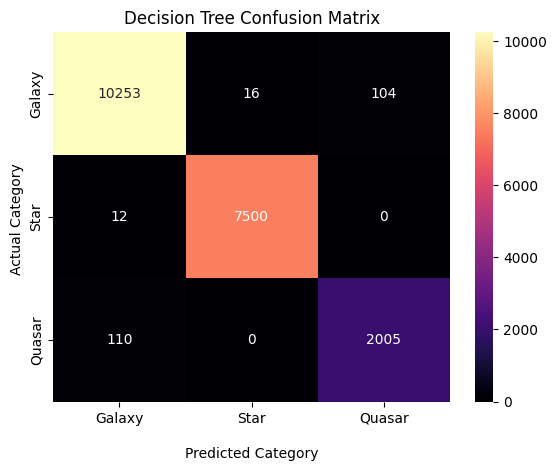

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

decTreeConfusionMatrix = sns.heatmap(confusionMatrixDecTree, annot=True, cmap='magma', fmt='d')

decTreeConfusionMatrix.set_title('Decision Tree Confusion Matrix')
decTreeConfusionMatrix.set_xlabel('\nPredicted Category')
decTreeConfusionMatrix.set_ylabel('Actual Category ')

## Ticket labels - List must be in alphabetical order
decTreeConfusionMatrix.xaxis.set_ticklabels(['Galaxy','Star', 'Quasar'])
decTreeConfusionMatrix.yaxis.set_ticklabels(['Galaxy','Star', 'Quasar'])

## Display the visualization of the Confusion Matrix.
plt.show()

## KNN Classifier

In [40]:
# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5,  # Adjust as needed
                                      metric='euclidean',  # Choose appropriate metric
                                      weights='uniform',  # or 'distance' based on preference
                                      algorithm='auto'  # Choose the algorithm
)

In [41]:
# Train the model on the training set
knn_model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [42]:
# Make predictions on the test set
pred_y = knn_model.predict(X_test)

In [43]:
# Evaluate the model
knn_accuracy = accuracy_score(y_test,pred_y)
knn_confusionMatrix = confusion_matrix(y_test,pred_y)
knn_report = classification_report(y_test, pred_y, digits = 5)

print(f"Accuracy: {knn_accuracy }")
print(f"Confusion Matrix:\n{knn_accuracy}")
print(f"Classification Report:\n{knn_report}")

Accuracy: 0.974
Confusion Matrix:
0.974
Classification Report:
              precision    recall  f1-score   support

           0    0.97190   0.99046   0.98109     10373
           1    0.97579   0.98176   0.97877      7512
           2    0.97862   0.86572   0.91872      2115

    accuracy                        0.97400     20000
   macro avg    0.97544   0.94598   0.95952     20000
weighted avg    0.97407   0.97400   0.97362     20000



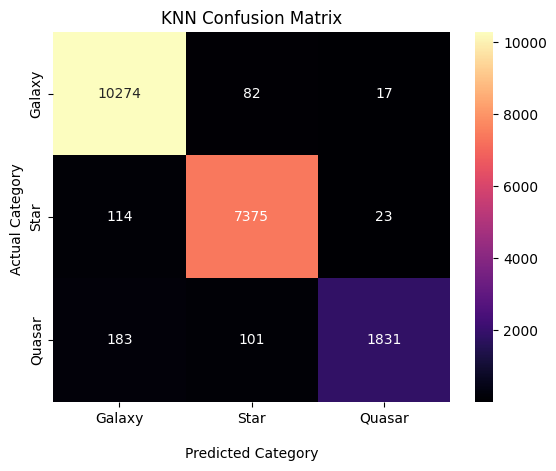

In [44]:
confusion_matrix_knn = sns.heatmap(knn_confusionMatrix, annot=True, cmap='magma', fmt='d')

confusion_matrix_knn.set_title('KNN Confusion Matrix')
confusion_matrix_knn.set_xlabel('\nPredicted Category')
confusion_matrix_knn.set_ylabel('Actual Category ')

## Ticket labels - List must be in alphabetical order
confusion_matrix_knn.xaxis.set_ticklabels(['Galaxy','Star', 'Quasar'])
confusion_matrix_knn.yaxis.set_ticklabels(['Galaxy','Star', 'Quasar'])

## Display the visualization of the Confusion Matrix.
plt.show()